# 3-10 네이버 영화 평점 기준 영화의 평점 변화 확인하기

- 네이버에서는 영화 평점을 보여주는 사이트가 있다. 
- 여기서는 인기 있는 영화를 알아볼 수도 있지만 지난 날짜의 인기도 확인할 수 있다. 
- https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20190610 에 접근해보면 영화 평점순으로 정렬되어 있는 정보를 만날 수 있다.

In [95]:
# Beautiful Soup와 pandas를 import 해준다.

from bs4 import BeautifulSoup  
import pandas as pd

In [96]:
# 해당 주소를 읽어온다.
# 소스코드가 길어 변수를 나눈것임

from urllib.request import urlopen

url_base = "http://movie.naver.com/"
url_syb = "movie/sdb/rank/rmovie.nhn?sel=cur&date=20190610"

page = urlopen(url_base+url_syb)

soup = BeautifulSoup(page, "html.parser")
# soup

In [97]:
soup.find_all('div','tit5')

[<div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=163788" title="알라딘">알라딘</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=136900" title="어벤져스: 엔드게임">어벤져스: 엔드게임</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=183132" title="교회오빠">교회오빠</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=31013" title="빌리 엘리어트">빌리 엘리어트</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=183136" title="뽀로로 극장판 보물섬 대모험">뽀로로 극장판 보물섬 대모험</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=10105" title="사랑은 비를 타고">사랑은 비를 타고</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=18781" title="이웃집 토토로">이웃집 토토로</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=165022" title="호텔 뭄바이">호텔 뭄바이</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=180169" title="어린 의뢰인">어린 의뢰인</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=181717" title="칠곡 가

- ※ 집계기준 : 2019.06.10일 까지 네이버영화에 수록 된 영화의 관람 후 평점

In [98]:
# 첫번째 랭킹 영화제목
soup.find_all('div','tit5')[0].a.string

'알라딘'

In [99]:
# 첫번째 랭킹 평점(포인트)
soup.find_all('td', 'point')[0].string

'9.50'

In [100]:
# 영화 랭킹 수
len(soup.find_all('td', 'point'))

47

In [101]:
# 영화 랭킹 순서대로 제목찾기
movie_name = [soup.find_all('div', 'tit5')[n].a.string for n in range(0, 47)]
movie_name

['알라딘',
 '어벤져스: 엔드게임',
 '교회오빠',
 '빌리 엘리어트',
 '뽀로로 극장판 보물섬 대모험',
 '사랑은 비를 타고',
 '이웃집 토토로',
 '호텔 뭄바이',
 '어린 의뢰인',
 '칠곡 가시나들',
 '댄서',
 '물랑 루즈',
 '인생 후르츠',
 '바그다드 카페 : 디렉터스컷',
 '배심원들',
 '나의 특별한 형제',
 '크게 될 놈',
 '바르다가 사랑한 얼굴들',
 '일일시호일',
 '안경',
 '자전거 탄 소년',
 '라라랜드',
 '오두막',
 '캐롤',
 '내일을 위한 시간',
 '기생충',
 '그녀',
 '스틸 앨리스',
 '아무르',
 '다가오는 것들',
 '카모메 식당',
 '로켓맨',
 '패터슨',
 '명탐정 피카츄',
 '나의 산티아고',
 '악인전',
 '프란시스 하',
 '고양이를 빌려드립니다',
 '떼시스',
 '아들',
 '콜 미 바이 유어 네임',
 '고질라: 킹 오브 몬스터',
 '엑스맨: 다크 피닉스',
 '서스페리아',
 '0.0MHz',
 '걸캅스',
 '더 보이']

In [102]:
# 영화 랭킹 순서대로 평점(포인트)찾기
movie_point = [soup.find_all('td', 'point')[n].string for n in range(0, 47)]
movie_point

['9.50',
 '9.39',
 '9.38',
 '9.30',
 '9.29',
 '9.26',
 '9.25',
 '9.24',
 '9.18',
 '9.12',
 '9.07',
 '9.06',
 '9.04',
 '9.01',
 '8.92',
 '8.90',
 '8.89',
 '8.88',
 '8.87',
 '8.62',
 '8.59',
 '8.59',
 '8.56',
 '8.56',
 '8.56',
 '8.54',
 '8.50',
 '8.45',
 '8.43',
 '8.35',
 '8.35',
 '8.35',
 '8.32',
 '8.20',
 '8.13',
 '8.12',
 '8.09',
 '8.03',
 '7.94',
 '7.86',
 '7.76',
 '7.23',
 '7.01',
 '6.94',
 '5.82',
 '5.63',
 '5.41']

In [103]:
# 10월 3일부터 100일간의 날짜를 정의한다.
date = pd.date_range('2019-06-10', periods=100, freq='D')
date

DatetimeIndex(['2019-06-10', '2019-06-11', '2019-06-12', '2019-06-13',
               '2019-06-14', '2019-06-15', '2019-06-16', '2019-06-17',
               '2019-06-18', '2019-06-19', '2019-06-20', '2019-06-21',
               '2019-06-22', '2019-06-23', '2019-06-24', '2019-06-25',
               '2019-06-26', '2019-06-27', '2019-06-28', '2019-06-29',
               '2019-06-30', '2019-07-01', '2019-07-02', '2019-07-03',
               '2019-07-04', '2019-07-05', '2019-07-06', '2019-07-07',
               '2019-07-08', '2019-07-09', '2019-07-10', '2019-07-11',
               '2019-07-12', '2019-07-13', '2019-07-14', '2019-07-15',
               '2019-07-16', '2019-07-17', '2019-07-18', '2019-07-19',
               '2019-07-20', '2019-07-21', '2019-07-22', '2019-07-23',
               '2019-07-24', '2019-07-25', '2019-07-26', '2019-07-27',
               '2019-07-28', '2019-07-29', '2019-07-30', '2019-07-31',
               '2019-08-01', '2019-08-02', '2019-08-03', '2019-08-04',
      

In [106]:
import urllib
from tqdm import tqdm_notebook

movie_date = []
movie_name = []
movie_point = []

for today in tqdm_notebook(date):
    html = "http://movie.naver.com/" + \
                                    "movie/sdb/rank/rmovie.nhn?sel=cur&date={date}"
    response = urlopen(html.format(date=
                                   urllib.parse.quote(today.strftime('%Y%m%d'))))
    soup = BeautifulSoup(response, "html.parser")
    
    end = len(soup.find_all('td', 'point'))
    
    movie_date.extend([today for n in range(0, end)])
    movie_name.extend([soup.find_all('div', 'tit5')[n].a.string for n in range(0, end)])
    movie_point.extend([soup.find_all('td', 'point')[n].string for n in range(0, end)])

- html을 지정할 때 중괄호 {}로 date라고 잡은 것은 그 밑에 response라는 변수에서 {date}를 변수로 취급하고 내용을 바꿀 것이기 때문이다. 
- 그러고 나서 제목과 포인트를 읽어왔다.

In [107]:
# 읽은 내용을 pandas로 저정한다. 
# 날짜별로 영화와 평점(포인트)가 저장되어있다.

movie = pd.DataFrame({'date':movie_date, 'name':movie_name, 
                                      'point':movie_point})
movie.head()

,date,name,point
0,2019-06-10,알라딘,9.50
1,2019-06-10,어벤져스: 엔드게임,9.39
2,2019-06-10,교회오빠,9.38
3,2019-06-10,빌리 엘리어트,9.30
4,2019-06-10,뽀로로 극장판 보물섬 대모험,9.29


- 만약 날짜가 아니라 영화별로 점수의 합산으로 데이터를 보고싶으면 pivot_table을 사용한다.

In [108]:
len(movie_date), len(movie_name), len(movie_point)

(4224, 4224, 4224)

In [109]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4224 entries, 0 to 4223
Data columns (total 3 columns):
date     4224 non-null datetime64[ns]
name     4224 non-null object
point    4224 non-null object
dtypes: datetime64[ns](1), object(2)
memory usage: 99.1+ KB


In [110]:
movie['point'] = movie['point'].astype(float)
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4224 entries, 0 to 4223
Data columns (total 3 columns):
date     4224 non-null datetime64[ns]
name     4224 non-null object
point    4224 non-null float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 99.1+ KB


In [111]:
import numpy as np

movie_unique = pd.pivot_table(movie, index=['name'], aggfunc=np.sum)
movie_best = movie_unique.sort_values(by='point', ascending=False)
movie_best.head()

,point
name,
알라딘,933.88
교회오빠,928.89
기생충,850.15
천로역정: 천국을 찾아서,784.23
토이 스토리 4,774.20


- pivot_table을 사용하여 영화별로 점수의 합산으로 데이터를 보면
- aggfunc으로 np.sum을 이용해서 합산을 해야 영화별 점수의 합계로 정렬될 것이다.
- 6월 10일부터 100일간 점수의 합산으로 볼 때 고득점 영화 1위부터 5위까지가 보인다.

In [112]:
# 영화제목을 지정해 한 가지 영화만 추려서 날짜별 평점 변화를 확인할 수 있다.

tmp = movie.query('name == ["알라딘"]')
tmp

,date,name,point
0,2019-06-10,알라딘,9.50
47,2019-06-11,알라딘,9.49
94,2019-06-12,알라딘,9.49
139,2019-06-13,알라딘,9.49
182,2019-06-14,알라딘,9.49
226,2019-06-15,알라딘,9.49
270,2019-06-16,알라딘,9.49
310,2019-06-17,알라딘,9.49
355,2019-06-18,알라딘,9.48
401,2019-06-19,알라딘,9.48


No handles with labels found to put in legend.


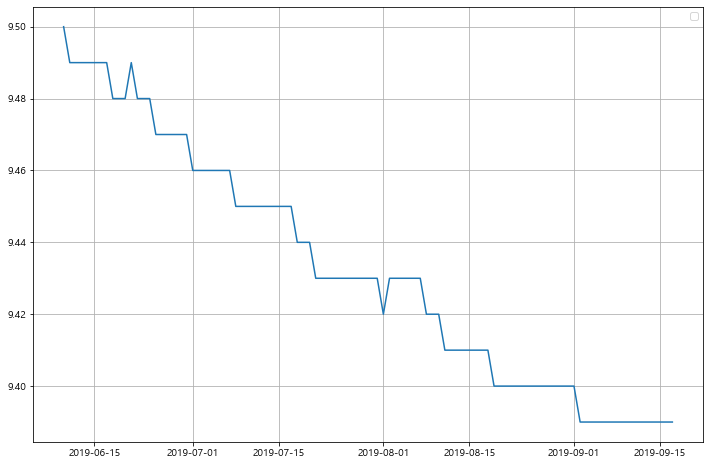

In [113]:
# 날짜별로 그래프를 그릴 수 있다.

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,8))
plt.plot(tmp['date'], tmp['point'])
plt.legend(loc='best')
plt.grid()
plt.show()

In [114]:
movie_best.head(10)

,point
name,
알라딘,933.88
교회오빠,928.89
기생충,850.15
천로역정: 천국을 찾아서,784.23
토이 스토리 4,774.20
어벤져스: 엔드게임,741.53
이웃집 토토로,740.86
존 윅 3: 파라벨룸,635.01
스파이더맨: 파 프롬 홈,599.45


# 3-11 영화별 날짜 변화에 따른 평점 변화 확인하기

In [115]:
# 날짜별로 정리되어 있던 데이터를 pivot_table을 이용하여 
# 세로축에는 날짜를 가로축에는 영화 제목을 넣을 수 있다.

movie_pivot = pd.pivot_table(movie, index=["date"], columns=['name'], 
                                         values=['point'])
movie_pivot.head()

point                                                         \
name       0.0MHz 1919 유관순 28일 후 47미터 2 500일의 썸머 가버나움 가장 따뜻한 색, 블루 건축학개론   
date                                                                       
2019-06-10   5.82      NaN   NaN    NaN      NaN  NaN          NaN   NaN   
2019-06-11   5.73      NaN   NaN    NaN      NaN  NaN          NaN   NaN   
2019-06-12   5.56      NaN   NaN    NaN      NaN  NaN          NaN   NaN   
2019-06-13   5.45      NaN   NaN    NaN      NaN  NaN          NaN   NaN   
2019-06-14   5.41      NaN   NaN    NaN      NaN  NaN          NaN   NaN   

                           ...                                            \
name         걸캅스 고양이를 부탁해  ... 토이 스토리 4 파리로 가는 길 팔로우   패터슨 퍼펙트 월드 프란시스 하   
date                       ...                                             
2019-06-10  5.63      NaN  ...      NaN      NaN NaN  8.32    NaN   8.09   
2019-06-11  5.63      NaN  ...      NaN      NaN NaN  8.32    NaN   8.09   
2019-06-12  5.63      NaN  ...      NaN      NaN NaN  8.32    NaN   8.09   
2019-06-13  5.63      NaN  ...      NaN      NaN NaN  8.32    NaN   8.09   
2019-06-14  5.63      NaN  ...      NaN      NaN NaN  8.32    NaN   8.09   

                                                     
name       항거:유관순 이야기 호텔 뭄바이 황혼에서 새벽까지 힘을 내요, 미스터 리  
date                                                 
2019-06-10        NaN   9.24       NaN          NaN  
2019-06-11        NaN   9.22       NaN          NaN  
2019-06-12        NaN   9.20       NaN          NaN  
2019-06-13        NaN   9.20       NaN          NaN  
2019-06-14        NaN   9.20       NaN          NaN  

[5 rows x 197 columns]

- 결과가 무엇인지 Jupyter Notbook화면에서는 판독하기 어렵지만 엑셀에서 읽으면 데이터 확인이 가능하다.

In [116]:
movie_pivot.columns = movie_pivot.columns.droplevel()

In [117]:
movie_pivot.head()

name,0.0MHz,1919 유관순,28일 후,47미터 2,500일의 썸머,가버나움,"가장 따뜻한 색, 블루",건축학개론,걸캅스,고양이를 부탁해,...,토이 스토리 4,파리로 가는 길,팔로우,패터슨,퍼펙트 월드,프란시스 하,항거:유관순 이야기,호텔 뭄바이,황혼에서 새벽까지,"힘을 내요, 미스터 리"
date,,,,,,,,,,,,,,,,,,,,,
2019-06-10,5.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.63,NaN,...,NaN,NaN,NaN,8.32,NaN,8.09,NaN,9.24,NaN,NaN
2019-06-11,5.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.63,NaN,...,NaN,NaN,NaN,8.32,NaN,8.09,NaN,9.22,NaN,NaN
2019-06-12,5.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.63,NaN,...,NaN,NaN,NaN,8.32,NaN,8.09,NaN,9.20,NaN,NaN
2019-06-13,5.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.63,NaN,...,NaN,NaN,NaN,8.32,NaN,8.09,NaN,9.20,NaN,NaN
2019-06-14,5.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.63,NaN,...,NaN,NaN,NaN,8.32,NaN,8.09,NaN,9.20,NaN,NaN


In [118]:
# 이 데이터에서 pivot_table의 결과로 붙은 컬럼 제목을 정리해본다.
# matplotlib에서의 한글 문제를 설정해준다.

import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin': # 맥 OS
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # window
    path = "c:/Windows/Fonts/malgun.ttf" 
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

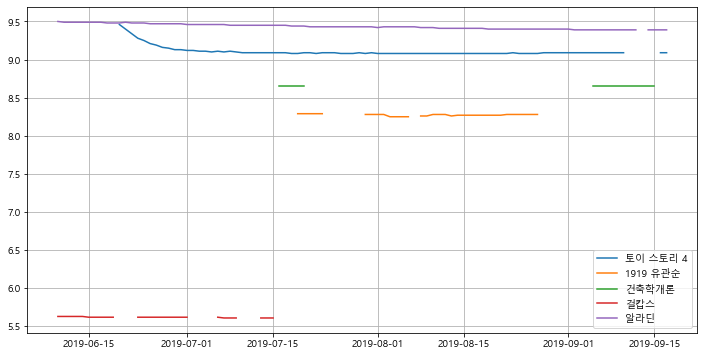

In [119]:
# 관심 있는 영화 몇 개를 지정해서 날짜별 변화를 확인해본다.

target_col = ['토이 스토리 4', '1919 유관순', '건축학개론', '걸캅스', '알라딘']
plt.figure(figsize=(12,6))
plt.plot(movie_pivot[target_col])
plt.legend(target_col, loc='best')
plt.grid()
plt.show()

- 토이스토리4가 개봉당시에는 높은 평점을 받았지만 점점 평점이 떨어지는것을 알 수있고, 알라딘은 높은 평점을 유지한다는 사실을 직접 확인할 수 있다.